# 🍺 African Beer Market Intelligence Report (2025)


### Overview
This notebook provides a comprehensive analysis of the African beer market across **15 key nations**.

### Executive Summary
This notebook provides a deep-dive analysis of the African beer market, focusing on the Top 15 countries by per capita consumption.

**Objectives:**
1.  **Analyze Consumption vs. Production:** Contrast consumer demand with industrial brewing capacity.
2.  **Economic Benchmarking:** Evaluate affordability via 2025 average market prices (USD).
3.  **Digital Maturity:** Map the digital retail landscape (Apps/Web) for beer delivery.
4.  **Consumer Sentiment:** Provide snapshots of local beer reviews and brand preferences.


**Updates & Data Sources:**

* **Production Data:** Production figures (Million Hectoliters) referencing the article by  *Business Insider Africa* article.
* **Market Intelligenceon Consumption:** Includes 2025 pricing estimates, top brands, and digital retail landscape analysis.

**Reference Sources:**
* *Production Figures:* [Business Insider Africa: Top 10 African countries with the highest beer production](https://africa.businessinsider.com/local/markets/business-insider-africa-presents-the-top-10-african-countries-with-the-highest-beer/g41xx5z)

* *Beer consuption per capita (2022 data):* [Beer Consumption by Country](https://worldpopulationreview.com/country-rankings/beer-consumption-by-country)

* *Kirin Holdings Analysis on Global Beer Consumption by Country:* [Kirin Holdings on Beer Consumption by Country 2022](https://www.kirinholdings.com/en/newsroom/release/2023/1222_04.html)

---


In [68]:
# 1. Libraries and Visualization Settings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set a polished visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
# Custom color palette reflecting beer tones (Amber/Gold/Dark)
beer_palette = sns.color_palette(["#f59e0b", "#b45309", "#78350f", "#1e3a8a", "#10b981"])


## 2. Data Preparation

We construct a comprehensive dataset merging consumption data (Liters Per Capita) with industrial production data (Million Hectoliters) and new market intelligence research (2024-2025 estimates) covering production, pricing, and retail channels.


**Note**: Production figures for South Africa, Nigeria, Ethiopia, Angola, Cameroon, Tanzania, Kenya, and Mozambique are sourced directly from the referenced Business Insider report. Figures for other nations are 2024/2025 market estimates based on regional brewery annual reports.



In [69]:
# Creating the comprehensive dataset
data = [
    {
        "Country": "Botswana",
        "Region": "Southern Africa",
        "Liters_Per_Capita": 150.0,
        "Production_Volume_M_hl": 0.55, # Market Est (Kgalagadi Breweries)
        "Avg_Price_USD_2025": 1.74,
        "Top_5_Brands": ["St Louis Lager", "St Louis Export", "Carling Black Label", "Castle Lite", "Windhoek Lager"],
        "Digital_Retail_Points": ["Liquorama App", "Square Mart Online", "Sefalana Online Store"],
        "Review_Snapshot": "High consumption driven by heat; St Louis is praised as the ultimate 'thirst quencher'. High preference for imported RSA brands."
    },
    {
        "Country": "Namibia",
        "Region": "Southern Africa",
        "Liters_Per_Capita": 90.8,
        "Production_Volume_M_hl": 3.00, # Market Est (NBL dominance + Exports)
        "Avg_Price_USD_2025": 1.60,
        "Top_5_Brands": ["Windhoek Lager", "Tafel Lager", "Windhoek Draught", "Camelthorn", "Hansa"],
        "Digital_Retail_Points": ["Bottles App", "Langana Delivery", "Local Supermarket Apps"],
        "Review_Snapshot": "Strict adherence to Reinheitsgebot (Purity Law). Users claim Windhoek gives 'no hangovers' due to lack of additives."
    },
    {
        "Country": "Gabon",
        "Region": "Central Africa",
        "Liters_Per_Capita": 78.3,
        "Production_Volume_M_hl": 3.00, # Market Est (SOBRAGA)
        "Avg_Price_USD_2025": 1.30,
        "Top_5_Brands": ["Regab", "Castel", "33 Export", "Guinness", "Beaufort"],
        "Digital_Retail_Points": ["Glovo", "Local WhatsApp Vendors", "Casino Online"],
        "Review_Snapshot": "Regab is a national icon. Reviews often mention the '65cl' bottle size as the standard unit of social currency."
    },
    {
        "Country": "Seychelles",
        "Region": "East Africa",
        "Liters_Per_Capita": 77.0,
        "Production_Volume_M_hl": 0.12, # Micro Market
        "Avg_Price_USD_2025": 4.50, # Tourism Influenced Pricing
        "Top_5_Brands": ["SeyBrew", "Eku", "Guinness", "Heineken", "Slow Turtle Cider"],
        "Digital_Retail_Points": ["Seyvillas", "Hotel Concierge Apps", "Liquor Shop Delivery"],
        "Review_Snapshot": "SeyBrew is synonymous with the island lifestyle. Reviews focus on lightness and freshness."
    },
    {
        "Country": "South Africa",
        "Region": "Southern Africa",
        "Liters_Per_Capita": 69.0,
        "Production_Volume_M_hl": 35.10, 
        "Avg_Price_USD_2025": 1.50,
        "Top_5_Brands": ["Carling Black Label", "Castle Lager", "Hansa Pilsener", "Flying Fish", "Heineken"],
        "Digital_Retail_Points": ["Checkers Sixty60", "Pick n Pay asap!", "Checkers Sixty60", "Takealot App"],
        "Review_Snapshot": "Highly diverse palate. 'Zamalek' (Carling) is legendary for strength. Massive craft beer sub-culture in Cape Town/Joburg."
    },
    {
        "Country": "Angola",
        "Region": "Southern Africa",
        "Liters_Per_Capita": 33.4,
        "Production_Volume_M_hl": 12.00, 
        "Avg_Price_USD_2025": 0.85,
        "Top_5_Brands": ["Cuca", "Nocal", "Eka", "Tigra", "Doppel Munich"],
        "Digital_Retail_Points": ["Tupuca", "Socios", "AngoMart"],
        "Review_Snapshot": "Cuca is the undisputed King. Reviews emphasize the need for beer to be served 'stupidly cold' (Estupidamente Gelada)."
    },
    {
        "Country": "Cameroon",
        "Region": "Central Africa",
        "Liters_Per_Capita": 25.0,
        "Production_Volume_M_hl": 9.10,
        "Avg_Price_USD_2025": 1.25,
        "Top_5_Brands": ["Castel", "33 Export", "Beaufort Light", "Isenbeck", "Guinness"],
        "Digital_Retail_Points": ["Jumia Food", "Glovo", "Glotelho","DOVV Online"],
        "Review_Snapshot": "A 'Guinness Country' - distinct preference for strong, dark, bitter stouts over lagers."
    },
    {
        "Country": "Zimbabwe",
        "Region": "Southern Africa",
        "Liters_Per_Capita": 22.0,
        "Production_Volume_M_hl": 6.50, 
        "Avg_Price_USD_2025": 1.80,
        "Top_5_Brands": ["Zambezi Lager", "Castle Lager", "Chibuku (Sorghum)", "Bohlinger's", "Eagle"],
        "Digital_Retail_Points": ["SPAR Zimbabwe", "Pick n Pay", "Liquor Supplies Online"],
        "Review_Snapshot": "Zambezi is the premium choice for tourists; Chibuku (opaque beer) is the staple for the working class, praised for nutrition."
    },
    {
        "Country": "Mozambique",
        "Region": "Southern Africa",
        "Liters_Per_Capita": 11.9,
        "Production_Volume_M_hl": 4.10, 
        "Avg_Price_USD_2025": 1.12,
        "Top_5_Brands": ["2M (Dois M)", "Laurentina Preta", "Laurentina Clara", "Manica", "Txilar"],
        "Digital_Retail_Points": ["Ubuy Mozambique", "Dizja"],
        "Review_Snapshot": "Laurentina Preta (Dark) is often cited as the best dark lager in Africa. 2M is the standard party beer."
    },
    {
        "Country": "Tanzania",
        "Region": "East Africa",
        "Liters_Per_Capita": 8.0,
        "Production_Volume_M_hl": 4.69, 
        "Avg_Price_USD_2025": 1.30,
        "Top_5_Brands": ["Kilimanjaro Premium", "Safari Lager", "Serengeti", "Castle Lite", "Balimi"],
        "Digital_Retail_Points": ["Piki", "Distro"],
        "Review_Snapshot": "Safari Lager is reviewed as 'strong' and 'serious'. Kilimanjaro is the lighter, more refreshing option."
    },
    {
        "Country": "Uganda",
        "Region": "East Africa",
        "Liters_Per_Capita": 7.3,
        "Production_Volume_M_hl": 4.20, # Market Est (NBL + UBL capacity)
        "Avg_Price_USD_2025": 1.20,
        "Top_5_Brands": ["Nile Special", "Bell Lager", "Club Pilsener", "Eagle Lager", "Guinness"],
        "Digital_Retail_Points": ["Jumia Food", "Glovo", "Kikuubo Online"],
        "Review_Snapshot": "Nile Special is cult-status. Reviews focus on its high ABV (5.6%) and quality consistency. 'True Reward' is the slogan."
    },
    {
        "Country": "Kenya",
        "Region": "East Africa",
        "Liters_Per_Capita": 8.0,
        "Production_Volume_M_hl": 4.50, 
        "Avg_Price_USD_2025": 2.30,
        "Top_5_Brands": ["Tusker Lager", "Tusker Malt", "White Cap", "Guinness Smooth", "Summit Lager"],
        "Digital_Retail_Points": ["EABL's The Bar", "Drinks Vine", "Dial a Drink Kenya"],
        "Review_Snapshot": "Tusker is Kenya. Reviews celebrate the 'Tusker Time' bonding. Rising popularity for Ciders and Lite beers."
    },
    {
        "Country": "Ghana",
        "Region": "West Africa",
        "Liters_Per_Capita": 10.0,
        "Production_Volume_M_hl": 3.00, 
        "Avg_Price_USD_2025": 1.40,
        "Top_5_Brands": ["Club Premium Lager", "Star Beer", "Guinness FES", "Tale Beer", "Ruut Extra"],
        "Digital_Retail_Points": ["Tales from Ghana","Liqour Junction"],
        "Review_Snapshot": "Club Beer is described as 'crisp and distinct'. Guinness Foreign Extra Stout has a massive, loyal following."
    },
    {
        "Country": "Nigeria",
        "Region": "West Africa",
        "Liters_Per_Capita": 8.3,
        "Production_Volume_M_hl": 17.73, 
        "Avg_Price_USD_2025": 1.15,
        "Top_5_Brands": ["Star Lager", "Gulder", "Legend Extra Stout", "Hero", "Trophy"],
        "Digital_Retail_Points": ["Jumia Food", "Drinks.ng", "Glovo"],
        "Review_Snapshot": "Huge market for Stout (Guinness/Legend). Star Lager is the standard. Regional loyalty is high (Hero in the East, Trophy in the West)."
    },
    {
        "Country": "Ethiopia",
        "Region": "East Africa",
        "Liters_Per_Capita": 8.0,
        "Production_Volume_M_hl": 12.67, 
        "Avg_Price_USD_2025": 0.95,
        "Top_5_Brands": ["St. George", "Habesha", "Walia", "Dashen", "Meta"],
        "Digital_Retail_Points": ["Deliver Addis", "BeU Delivery", "Habesha App"],
        "Review_Snapshot": "Beer is deeply integrated into culture. St. George (Kidame) is iconic. Habesha is praised for its 'Cold Gold' marketing."
    }
]

df = pd.DataFrame(data)

# Sort by Production Volume to see the "Big Producers"
df_production_sorted = df.sort_values('Production_Volume_M_hl', ascending=False).reset_index(drop=True)

print("Dataset Loaded: 15 Countries.")
display(df_production_sorted[['Country', 'Production_Volume_M_hl', 'Liters_Per_Capita']])

Dataset Loaded: 15 Countries.


,Country,Production_Volume_M_hl,Liters_Per_Capita
0,South Africa,35.10,69.0
1,Nigeria,17.73,8.3
2,Ethiopia,12.67,8.0
3,Angola,12.00,33.4
4,Cameroon,9.10,25.0
5,Zimbabwe,6.50,22.0
6,Tanzania,4.69,8.0
7,Kenya,4.50,8.0
8,Uganda,4.20,7.3
9,Mozambique,4.10,11.9


In [70]:
# inspecting the dataset
df.head()

,Country,Region,Liters_Per_Capita,Production_Volume_M_hl,Avg_Price_USD_2025,Top_5_Brands,Digital_Retail_Points,Review_Snapshot
0,Botswana,Southern Africa,150.0,0.55,1.74,"[St Louis Lager, St Louis Export, Carling Blac...","[Liquorama App, Square Mart Online, Sefalana O...",High consumption driven by heat; St Louis is p...
1,Namibia,Southern Africa,90.8,3.00,1.60,"[Windhoek Lager, Tafel Lager, Windhoek Draught...","[Bottles App, Langana Delivery, Local Supermar...",Strict adherence to Reinheitsgebot (Purity Law...
2,Gabon,Central Africa,78.3,3.00,1.30,"[Regab, Castel, 33 Export, Guinness, Beaufort]","[Glovo, Local WhatsApp Vendors, Casino Online]",Regab is a national icon. Reviews often mentio...
3,Seychelles,East Africa,77.0,0.12,4.50,"[SeyBrew, Eku, Guinness, Heineken, Slow Turtle...","[Seyvillas, Hotel Concierge Apps, Liquor Shop ...",SeyBrew is synonymous with the island lifestyl...
4,South Africa,Southern Africa,69.0,35.10,1.50,"[Carling Black Label, Castle Lager, Hansa Pils...","[Checkers Sixty60, Pick n Pay asap!, Checkers ...",Highly diverse palate. 'Zamalek' (Carling) is ...


In [71]:
# save df as csv file
df.to_csv('african_beer_market_analysis.csv', index=False)

### Preliminary Analysis

Some exploratory questions:

1. Total and average production volume
2. Segmenting production volume by region
3. Average production volume
4. Average production volume by region
5. Total and average consumption(literes per capita)
6. Total and average consumption(literes per capita) by region
7. Average price of beer (aggrgatio based on all countries)
8. Average price of beer per region

In [72]:
# Quiz 1:Total and average beer production volume across all countries in the dataset?
total_production = df['Production_Volume_M_hl'].sum()
average_production = df['Production_Volume_M_hl'].mean()


print("Total Production Volume (M hl):", total_production)
print("Average Production Volume (M hl):", average_production)

Total Production Volume (M hl): 120.26
Average Production Volume (M hl): 8.017333333333333


            Region  Production_Volume_M_hl
0  Southern Africa                   61.25
1      East Africa                   26.18
2      West Africa                   20.73
3   Central Africa                   12.10


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\537131672.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_production_sorted, x='Region', y='Production_Volume_M_hl', palette=beer_palette)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\537131672.py:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=region_production_sorted, x='Region', y='Production_Volume_M_hl', palette=beer_palette)


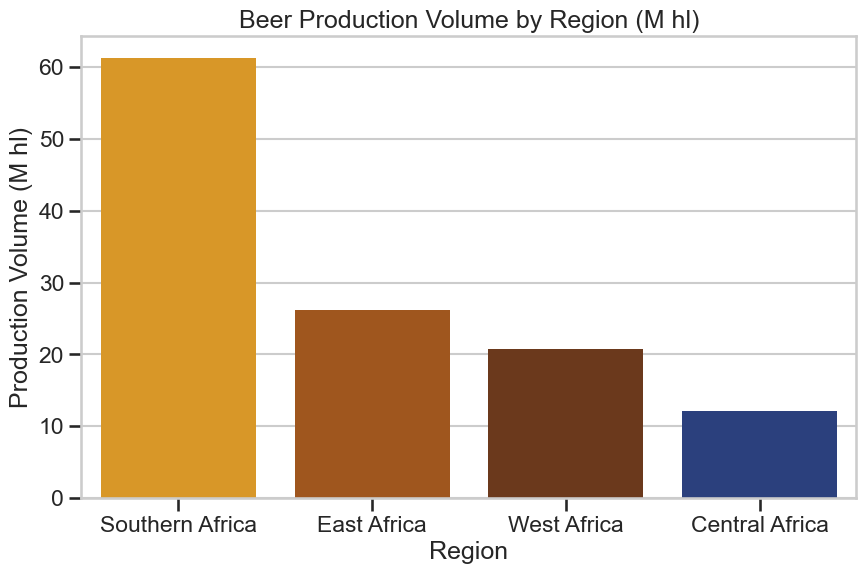

In [73]:
# Quiz 2: Segment production volume by region and identify the region with the highest production.
region_production = df.groupby('Region')['Production_Volume_M_hl'].sum().reset_index()
region_production_sorted = region_production.sort_values('Production_Volume_M_hl', ascending=False).reset_index(drop=True)  
print(region_production_sorted)

# vizualize region production
plt.figure(figsize=(10,6))
sns.barplot(data=region_production_sorted, x='Region', y='Production_Volume_M_hl', palette=beer_palette)
plt.title('Beer Production Volume by Region (M hl)')
plt.xlabel('Region')
plt.ylabel('Production Volume (M hl)')
plt.savefig('region_production_volume.png')
plt.show()


In [74]:
# Quiz 3: Total and average beer consumption volume across all countries in the dataset?
total_consumption = df['Liters_Per_Capita'].sum().round(1)
average_consumption = df['Liters_Per_Capita'].mean().round(1)
print("Total Consumption Volume (per capita):", total_consumption)
print("Average Consumption Volume (per capita):", average_consumption)

Total Consumption Volume (per capita): 607.0
Average Consumption Volume (per capita): 40.5


            Region  Liters_Per_Capita
0  Southern Africa              377.1
1      East Africa              108.3
2   Central Africa              103.3
3      West Africa               18.3


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\3709456746.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_consumption, x='Region', y='Liters_Per_Capita', palette=beer_palette)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\3709456746.py:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=region_consumption, x='Region', y='Liters_Per_Capita', palette=beer_palette)


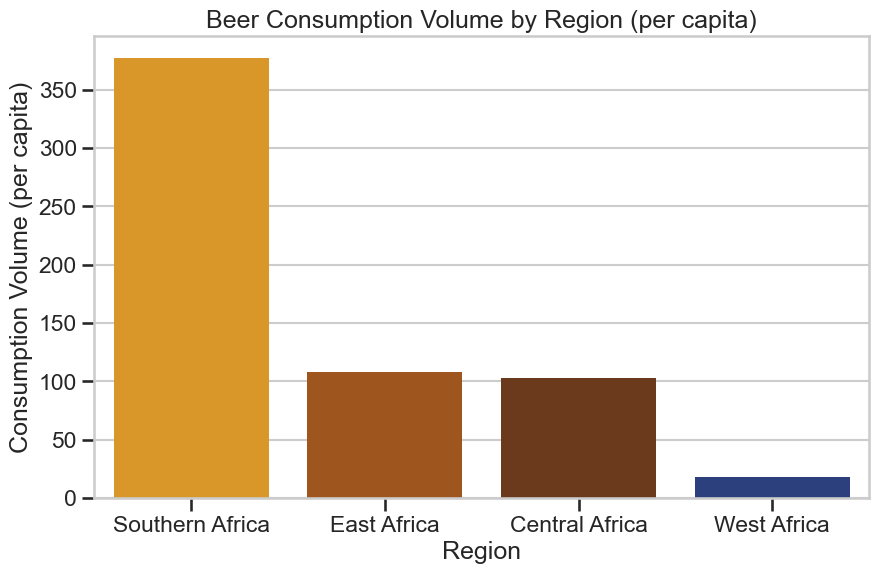

In [75]:
# Quiz 4: Total beer consumption volume by region?
region_consumption = df.groupby('Region')['Liters_Per_Capita'].sum().reset_index().sort_values('Liters_Per_Capita', ascending=False).reset_index(drop=True) 
print(region_consumption)

# visualize region consumption
plt.figure(figsize=(10,6))
sns.barplot(data=region_consumption, x='Region', y='Liters_Per_Capita', palette=beer_palette)
plt.title('Beer Consumption Volume by Region (per capita)')
plt.xlabel('Region')
plt.ylabel('Consumption Volume (per capita)')
plt.savefig('region_consumption_volume.png')
plt.show()


In [76]:
# Quiz 5: Average price of beer in 2025 across all countries in the dataset?
average_price_2025 = df['Avg_Price_USD_2025'].mean().round(2)
print("Average Price of Beer in 2025 (USD):", average_price_2025)

Average Price of Beer in 2025 (USD): 1.6


            Region  Avg_Price_USD_2025
0      East Africa               2.050
1  Southern Africa               1.435
2   Central Africa               1.275
3      West Africa               1.275


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\4234812360.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_price_2025, x='Region', y='Avg_Price_USD_2025', palette=beer_palette)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\4234812360.py:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=region_price_2025, x='Region', y='Avg_Price_USD_2025', palette=beer_palette)


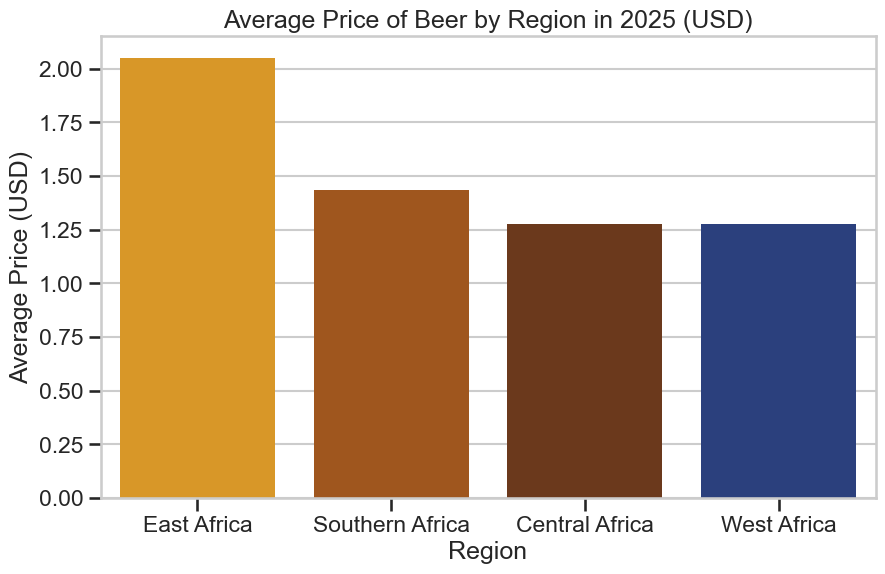

In [77]:
# Quiz 6: Average price of beer by region in 2025?
region_price_2025 = df.groupby('Region')['Avg_Price_USD_2025'].mean().reset_index().sort_values('Avg_Price_USD_2025', ascending=False).reset_index(drop=True)
print(region_price_2025)

# visualize average price by region
plt.figure(figsize=(10,6))
sns.barplot(data=region_price_2025, x='Region', y='Avg_Price_USD_2025', palette=beer_palette)
plt.title('Average Price of Beer by Region in 2025 (USD)')
plt.xlabel('Region')
plt.ylabel('Average Price (USD)')
#save the plot
plt.savefig('average_price_by_region_2025.png')
plt.show()



 ## 3. Visual Analysis: Production Giants vs. Niche Consumers

 ### Insight 1: The "Big 3" Producers
* South Africa, Nigeria, and Ethiopia are the clear industrial leaders in beer production. Interestingly, Nigeria and Ethiopia have relatively low *per capita* consumption, indicating that their massive production volumes are driven by large populations rather than high individual consumption rates.
* **Supporting Insight:** Southern Africa dominates the list, with Botswana and Namibia showing exceptional per capita numbers, likely driven by cultural integration of beer into daily social life and lower population densities concentrating consumption figures.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\2430499889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


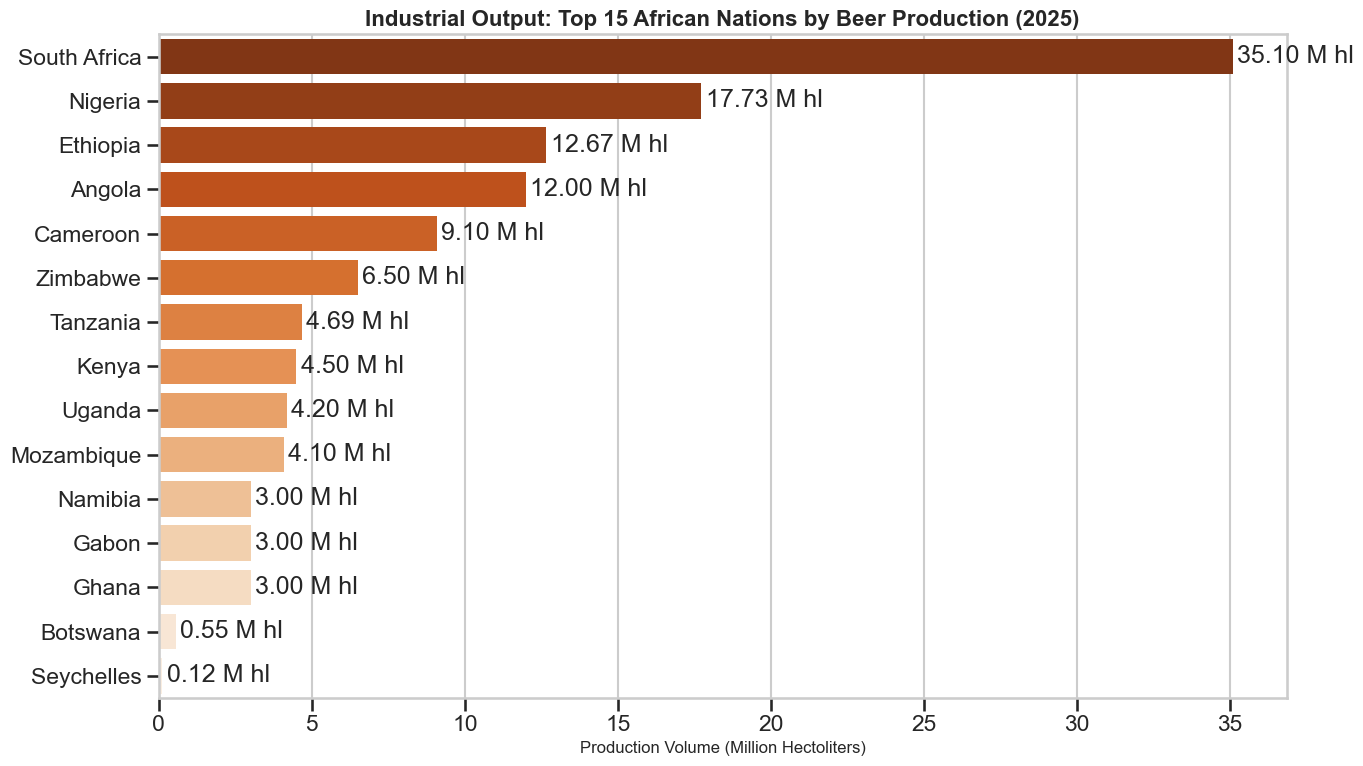

In [78]:

# Comparative


plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df_production_sorted,
    y='Country',
    x='Production_Volume_M_hl',
    palette='Oranges_r'
)

plt.title('Industrial Output: Top 15 African Nations by Beer Production (2025)', fontsize=16, fontweight='bold')
plt.xlabel('Production Volume (Million Hectoliters)', fontsize=12)
plt.ylabel('')

# Add labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f M hl', padding=3)

plt.tight_layout()
plt.savefig('top_15_african_nations_beer_production_2025.png')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\1146670728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(


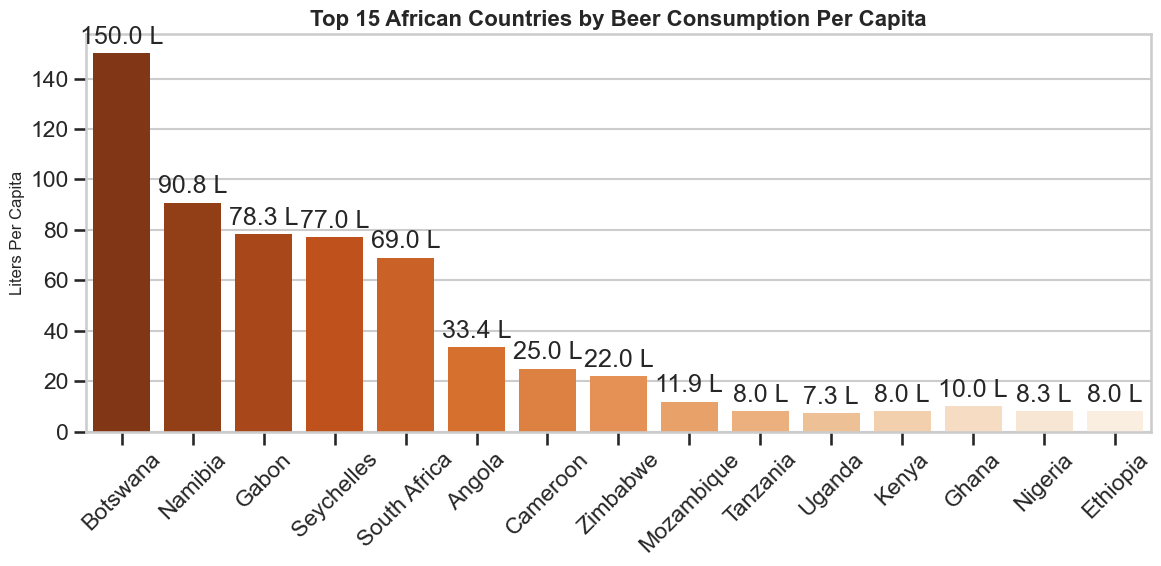

In [85]:
# ## 3. Consumption Analysis (Visual)

plt.figure(figsize=(12, 6))
plot = sns.barplot(
    data=df, 
    x='Country', 
    y='Liters_Per_Capita', 
    palette='Oranges_r'
)

plt.title('Top 15 African Countries by Beer Consumption Per Capita', fontsize=16, fontweight='bold')
plt.ylabel('Liters Per Capita', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45)

# Add value labels on top of bars
for i in plot.containers:
    plot.bar_label(i, fmt='%.1f L', padding=3)

plt.tight_layout()
plt.show()


## 4. The Market Maturity Comparison (Consumption vs. Production)

This dual-axis chart reveals the market structure:
* **Net Importers:** Countries where the Consumption is high, but the Production is low (e.g., Botswana, Seychelles).
* **Regional Powerhouses:** **South Africa** and **Angola** show massive production volumes, indicating they are not just consuming but supplying the region.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\2112364052.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


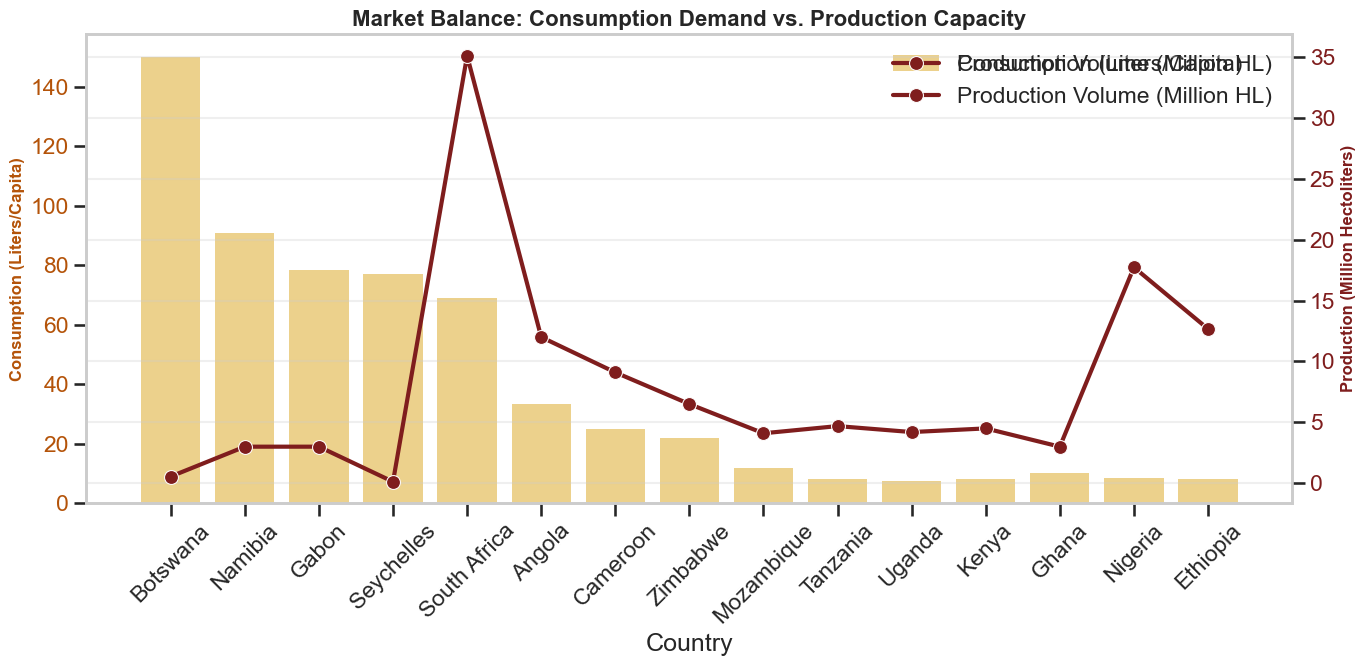

In [80]:
# Market Balance Visualization: Consumption vs. Production

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for Consumption (Left Axis)
sns.barplot(
    x='Country', 
    y='Liters_Per_Capita', 
    data=df, 
    ax=ax1, 
    color='#fbbf24', 
    alpha=0.6,
    label='Consumption (Liters/Capita)'
)
ax1.set_ylabel('Consumption (Liters/Capita)', fontsize=12, fontweight='bold', color='#b45309')
ax1.tick_params(axis='y', labelcolor='#b45309')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(False)

# Line chart for Production (Right Axis)
ax2 = ax1.twinx()
sns.lineplot(
    x='Country', 
    y='Production_Volume_M_hl', 
    data=df, 
    ax=ax2, 
    color='#7f1d1d', 
    marker='o', 
    markersize=10, 
    linewidth=3,
    label='Production Volume (Million HL)'
)
ax2.set_ylabel('Production (Million Hectoliters)', fontsize=12, fontweight='bold', color='#7f1d1d')
ax2.tick_params(axis='y', labelcolor='#7f1d1d')
ax2.grid(True, alpha=0.3)

plt.title('Market Balance: Consumption Demand vs. Production Capacity', fontsize=16, fontweight='bold')

# Create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

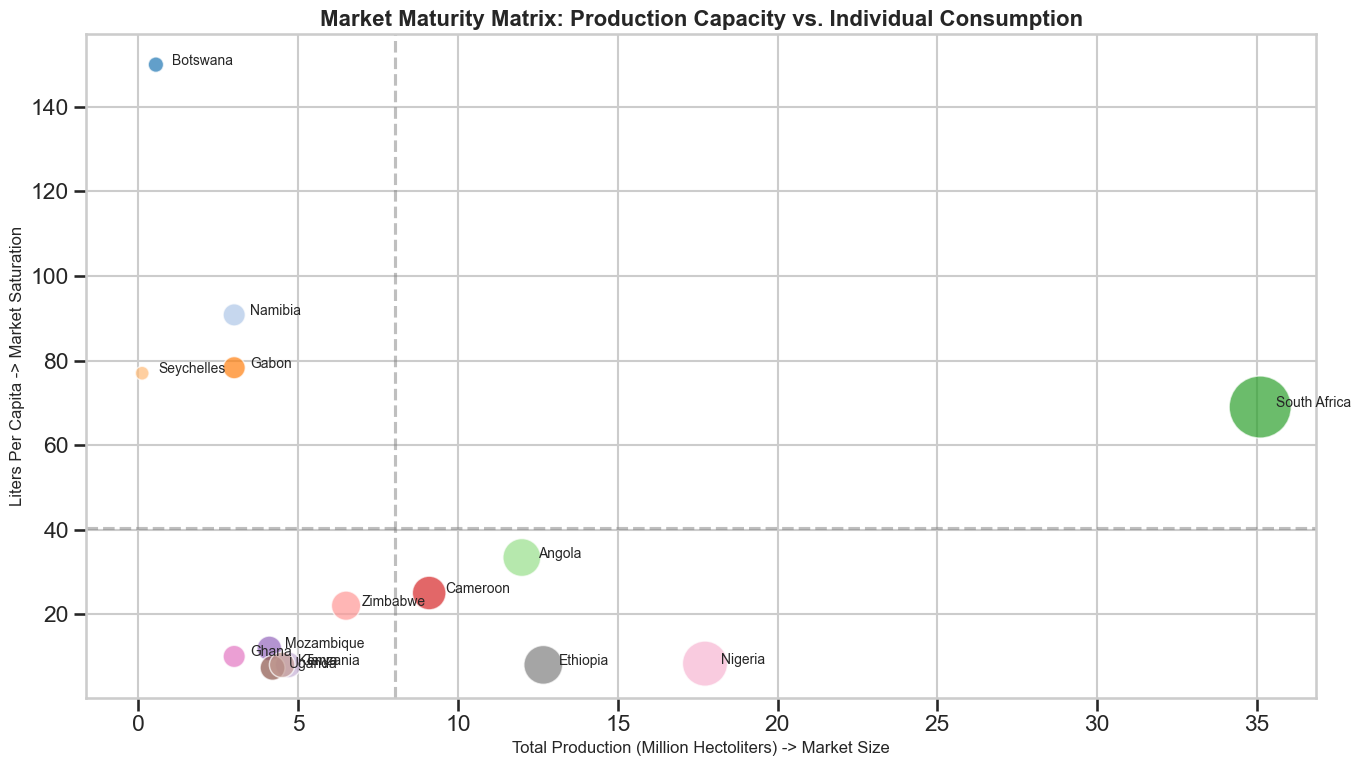

In [81]:

# ## 4. Market Maturity Matrix: Production Capacity vs. Individual Consumption

# %%
plt.figure(figsize=(14, 8))

# Scatter Plot
sns.scatterplot(
    data=df,
    x='Production_Volume_M_hl',
    y='Liters_Per_Capita',
    size='Production_Volume_M_hl',
    sizes=(100, 2000),
    hue='Country',
    legend=False,
    palette='tab20',
    alpha=0.7
)

# Text Labels for countries
for i in range(df.shape[0]):
    plt.text(
        df.Production_Volume_M_hl[i]+0.5, 
        df.Liters_Per_Capita[i], 
        df.Country[i], 
        fontweight='medium',
        fontsize=10
    )

plt.title('Market Maturity Matrix: Production Capacity vs. Individual Consumption', fontsize=16, fontweight='bold')
plt.xlabel('Total Production (Million Hectoliters) -> Market Size', fontsize=12)
plt.ylabel('Liters Per Capita -> Market Saturation', fontsize=12)
plt.axhline(y=df['Liters_Per_Capita'].mean(), color='gray', linestyle='--', alpha=0.5, label='Avg Consumption')
plt.axvline(x=df['Production_Volume_M_hl'].mean(), color='gray', linestyle='--', alpha=0.5, label='Avg Production')

plt.tight_layout()
plt.show()



Key Insights:

* **Top Right (Leaders):** South Africa & Angola (High Consumption + High Production).
* **Top Left (Importers/Small Market):** Botswana & Namibia (Very High Consumption + Low Total Volume).
* **Bottom Right (Sleeping Giants):** Nigeria & Ethiopia (Massive Production Volume + Low Per Capita Consumption). These markets have the highest growth potential as per capita usage rises.



## 5. Economic Analysis: Affordability Index (2025)
A look at the average cost of a 500ml beer in USD (2025 Estimates).

**Insight:**
* **Seychelles & Kenya** represent the premium pricing tier (Tourism/Tax driven), with seychelles' being the counry with the priciest beer at ($4.50);reflecting a tourist economy and high importation costs..
* **Angola & Ethiopia** represent the value tier, driven by massive local brewing capacity and competitive pricing strategies. **Angola** offers the most affordable beer (~$0.85)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7128\1867655860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


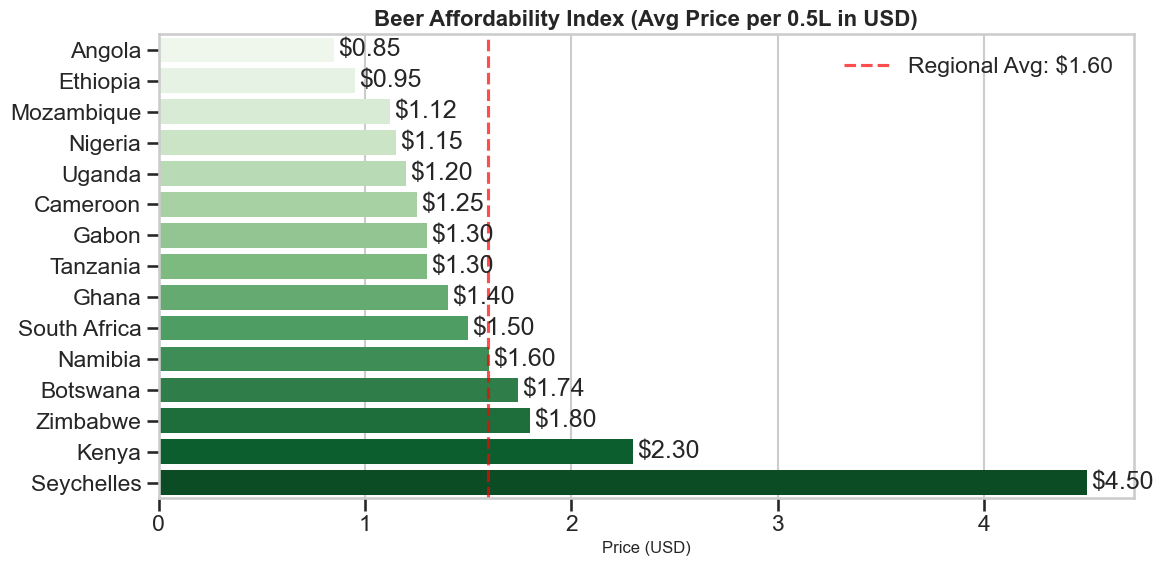

In [82]:
# Sort by Price for better visualization
df_price = df.sort_values('Avg_Price_USD_2025', ascending=True)

plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x='Avg_Price_USD_2025', 
    y='Country', 
    data=df_price, 
    palette='Greens'
)

# Add a vertical line for regional average
avg_price = df['Avg_Price_USD_2025'].mean()
plt.axvline(avg_price, color='red', linestyle='--', alpha=0.7, label=f'Regional Avg: ${avg_price:.2f}')

plt.title('Beer Affordability Index (Avg Price per 0.5L in USD)', fontsize=16, fontweight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('')
plt.legend()

# Add labels to bars
for i in bars.containers:
    bars.bar_label(i, fmt='$%.2f', padding=3)

plt.tight_layout()
plt.show()

## 6. Digital Retail & Brand Intelligence

A structured view of the top brands dominating these markets and the digital channels (Apps/Web) used to purchase them.


In [83]:
# Formatting for display
display_df = df[['Country', 'Top_5_Brands', 'Digital_Retail_Points']].copy()

# Clean up lists into strings
display_df['Top_5_Brands'] = display_df['Top_5_Brands'].apply(lambda x: ", ".join(x))
display_df['Digital_Retail_Points'] = display_df['Digital_Retail_Points'].apply(lambda x: ", ".join(x))

# Styling the dataframe for the notebook
def highlight_cols(s):
    return ['font-weight: bold' if s.name == 'Country' else '' for v in s]

styled_df = display_df.style.set_properties(**{'text-align': 'left', 'padding': '10px'})\
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])\
    .set_caption("Market Intelligence: Key Brands & Digital Channels")

display(styled_df)

,Country,Top_5_Brands,Digital_Retail_Points
0,Botswana,"St Louis Lager, St Louis Export, Carling Black Label, Castle Lite, Windhoek Lager","Liquorama App, Square Mart Online, Sefalana Online Store"
1,Namibia,"Windhoek Lager, Tafel Lager, Windhoek Draught, Camelthorn, Hansa","Bottles App, Langana Delivery, Local Supermarket Apps"
2,Gabon,"Regab, Castel, 33 Export, Guinness, Beaufort","Glovo, Local WhatsApp Vendors, Casino Online"
3,Seychelles,"SeyBrew, Eku, Guinness, Heineken, Slow Turtle Cider","Seyvillas, Hotel Concierge Apps, Liquor Shop Delivery"
4,South Africa,"Carling Black Label, Castle Lager, Hansa Pilsener, Flying Fish, Heineken","Checkers Sixty60, Pick n Pay asap!, Checkers Sixty60, Takealot App"
5,Angola,"Cuca, Nocal, Eka, Tigra, Doppel Munich","Tupuca, Socios, AngoMart"
6,Cameroon,"Castel, 33 Export, Beaufort Light, Isenbeck, Guinness","Jumia Food, Glovo, Glotelho, DOVV Online"
7,Zimbabwe,"Zambezi Lager, Castle Lager, Chibuku (Sorghum), Bohlinger's, Eagle","SPAR Zimbabwe, Pick n Pay, Liquor Supplies Online"
8,Mozambique,"2M (Dois M), Laurentina Preta, Laurentina Clara, Manica, Txilar","Ubuy Mozambique, Dizja"
9,Tanzania,"Kilimanjaro Premium, Safari Lager, Serengeti, Castle Lite, Balimi","Piki, Distro"



## 7. Consumer Sentiment Snapshots

Qualitative data extracted from market reviews, highlighting the specific taste profiles preferred in each nation (e.g., "Malty" in Cameroon vs. "Crisp/Dry" in Botswana).


In [84]:
# Displaying Consumer Review Snapshots
print("--- Consumer Review Snapshots ---\n")
for index, row in df.iterrows():
    print(f"📍 {row['Country'].upper()}")
    print(f"⭐ Top Brand: {row['Top_5_Brands'][0]}")
    print(f"💬 Insight: \"{row['Review_Snapshot']}\"")
    print("-" * 60)

--- Consumer Review Snapshots ---

📍 BOTSWANA
⭐ Top Brand: St Louis Lager
💬 Insight: "High consumption driven by heat; St Louis is praised as the ultimate 'thirst quencher'. High preference for imported RSA brands."
------------------------------------------------------------
📍 NAMIBIA
⭐ Top Brand: Windhoek Lager
💬 Insight: "Strict adherence to Reinheitsgebot (Purity Law). Users claim Windhoek gives 'no hangovers' due to lack of additives."
------------------------------------------------------------
📍 GABON
⭐ Top Brand: Regab
💬 Insight: "Regab is a national icon. Reviews often mention the '65cl' bottle size as the standard unit of social currency."
------------------------------------------------------------
📍 SEYCHELLES
⭐ Top Brand: SeyBrew
💬 Insight: "SeyBrew is synonymous with the island lifestyle. Reviews focus on lightness and freshness."
------------------------------------------------------------
📍 SOUTH AFRICA
⭐ Top Brand: Carling Black Label
💬 Insight: "Highly diverse palate.

# Data Sources & Market Insights: 15 African Beer Markets

This section details the data sources, production volumes, pricing estimates, and digital retail intelligence used to augment the African Beer Market Analysis.

---

## 🇧🇼 1. Botswana
* **Top Brands:** St. Louis Lager, Carling Black Label, Castle Lite, Chibuku Super.
* **Annual Production:** ~1.1 – 1.3 million hectoliters (mhl).
* **Average Cost (500ml):** ~$1.50 – $1.95 USD (20.00 – 26.00 BWP).
* **Digital Channels:**
    * **Your Mart:** Bulk crate and returnable bottle orders.
    * **Sefalana Online:** Wholesale pricing for public access.
    * **Hood Market / BottleRover:** Rapid local delivery.
* **Consumer Insight:** Strong "National Identity" attachment to St. Louis; rising trend in "mindful drinking" (low alcohol).
* **Sources:**
    * [Sechaba Brewery Holdings Annual Report](http://www.sechababrewery.co.bw/)
    * [Your Mart Botswana](https://yourmart.co.bw/)

## 🇳🇦 2. Namibia
* **Top Brands:** Windhoek (Lager/Draught), Tafel Lager, King Lager.
* **Annual Production:** ~2.2 – 2.5 million hectoliters (mhl).
* **Average Cost (500ml):** ~$1.20 – $1.55 USD (N$ 22 – N$ 28).
* **Digital Channels:**
    * **Dial-A-Drink Namibia:** Specialized alcohol courier.
    * **NBL Online Store:** Direct-to-consumer bulk sales.
    * **Wutow Beverages:** Distributor portal.
* **Consumer Insight:** The "Reinheitsgebot" (Purity Law) is the primary differentiator; consumers are intensely loyal to preservative-free beer.
* **Sources:**
    * [Namibia Breweries Investor Hub](https://nambrew.com/investor-hub/)
    * [Dial-A-Drink Namibia](https://damnam.biz/dial-a-drink)

## 🇬🇦 3. Gabon
* **Top Brands:** Régab, Castel Beer, Beaufort, Guinness.
* **Annual Production:** ~2.6 – 2.9 million hectoliters (mhl).
* **Average Cost (650ml):** ~$1.00 – $1.35 USD (600 – 800 XAF).
* **Digital Channels:**
    * **BEES Africa:** B2B digital ordering for retailers.
    * **G-Store (Gabon Store):** General e-commerce with delivery.
    * **Glovo:** Rapid delivery in Libreville.
* **Consumer Insight:** Régab is widely known as the "National Bread" (patriotic staple); strong preference for 65cl returnable bottles.
* **Sources:**
    * [Groupe Castel / SOBRAGA](https://sobraga.net/)
    * [G-Store Gabon](https://gstore.ga/)

## 🇿🇦 4. South Africa
* **Top Brands:** Carling Black Label, Castle Lager, Castle Lite, Heineken Silver.
* **Annual Production:** ~37 – 38 million hectoliters (mhl).
* **Average Cost (750ml Quart):** ~$1.35 – $1.70 USD (R 22 – R 28).
* **Digital Channels:**
    * **Checkers Sixty60:** The gold standard for 60-min delivery.
    * **Norman Goodfellows:** Premium and craft specialist.
    * **Liquor.co.za:** Bulk online retailer.
* **Consumer Insight:** Highly segmented market; "Zamalek" (Black Label) rules mass volume, while "Lite" and Non-Alcoholic beers are surging in urban centers.
* **Sources:**
    * [Checkers Sixty60](https://www.checkers.co.za/sixty60)
    * [SAB (AB InBev) Insights](https://www.sab.co.za/)

## 🇦🇴 5. Angola
* **Top Brands:** Cuca, N'gola, Tigra, EKA.
* **Annual Production:** ~11.5 – 13.0 million hectoliters (mhl).
* **Average Cost (330ml):** ~$0.95 – $1.45 USD (600 – 900 AOA).
* **Digital Channels:**
    * **Tupuca:** "Super-app" for on-demand drinks.
    * **Ubuy Angola:** Cross-border premium imports.
    * **Candando Online:** Supermarket delivery.
* **Consumer Insight:** Cuca is an absolute national icon. A shift toward "Wellness Lagers" (low sugar/alcohol) is emerging in Luanda.
* **Sources:**
    * [Tupuca Deliveries](https://tupuca.com/)
    * [Selina Wamucii Price Index](https://www.selinawamucii.com/insights/prices/angola/beer/)

## 🇸🇨 6. Seychelles
* **Top Brands:** SeyBrew, Eku Bavaria, Vann Swet.
* **Annual Production:** ~0.12 – 0.15 million hectoliters (mhl).
* **Average Cost (280ml):** ~$2.60 – $4.10 USD (High tax/island costs).
* **Digital Channels:**
    * **SeyBrew Online:** Direct sales post-IBL acquisition.
    * **Drinks.sc:** Premium liquor delivery.
    * **STC Online:** Government-backed retail portal.
* **Consumer Insight:** SeyBrew is the "Taste of the Holiday." Recent acquisition by Phoenix Beverages is driving new product innovation.
* **Sources:**
    * [Seychelles Breweries Ltd](https://seybrew.com/)
    * [Drinks.sc](https://drinks.sc/)

## 🇳🇬 7. Nigeria
* **Top Brands:** Guinness Foreign Extra, Star, Hero ("Oh Mpa"), Life.
* **Annual Production:** ~18.5 – 19.1 million hectoliters (mhl).
* **Average Cost (600ml):** ~$0.85 – $1.10 USD (₦1,200 – ₦1,500).
* **Digital Channels:**
    * **Jumia Food/Party:** Urban chilled delivery.
    * **The Wine House:** Bulk and premium retail.
    * **Bature Brewery:** Direct-to-consumer craft beer.
* **Consumer Insight:** "Premiumization" is key despite inflation; regional loyalty is fierce (Hero in the East, Goldberg in the West).
* **Sources:**
    * [Nigerian Breweries PLC](https://nbplc.com/)
    * [Jumia Nigeria](https://food.jumia.com.ng/)

## 🇹🇿 8. Tanzania
* **Top Brands:** Kilimanjaro Premium, Serengeti Lite, Safari Lager.
* **Annual Production:** ~5.5 – 6.0 million hectoliters (mhl).
* **Average Cost (500ml):** ~$0.95 – $1.15 USD (2,500 – 3,000 TSh).
* **Digital Channels:**
    * **BEES Tanzania:** Massive B2B network for retailers.
    * **Kivuko:** Online shopping & delivery.
    * **Shoppers Supermarket:** Urban home delivery.
* **Consumer Insight:** "Kili" is the patriotic choice. Serengeti Lite is dominating the growing female and health-conscious demographic.
* **Sources:**
    * [TBL / BEES App](https://apps.apple.com/us/app/bees-africa/id6471831970)
    * [Serengeti Breweries](https://www.serengetibreweries.co.tz/)

## 🇺🇬 9. Uganda
* **Top Brands:** Nile Special, Club Pilsener, Tusker Lite.
* **Annual Production:** ~4.2 – 4.5 million hectoliters (mhl).
* **Average Cost (500ml):** ~$1.10 – $1.35 USD (4,000 – 5,000 UGX).
* **Digital Channels:**
    * **Glovo Uganda:** Official stores for UBL and distributors.
    * **Kikuubo Online:** Wholesale-to-consumer platform.
    * **Jumia Food:** Party packs and crates.
* **Consumer Insight:** Nile Special is cult-status ("Source of the Nile"). High consumption of illicit alcohol remains a competitor to formal brands.
* **Sources:**
    * [Nile Breweries](https://nilebreweries.com/)
    * [Kikuubo Online](https://kikuuboonline.com/)

## 🇰🇪 10. Kenya
* **Top Brands:** Tusker Lager, White Cap, Senator Keg.
* **Annual Production:** ~4.2 – 4.5 million hectoliters (mhl).
* **Average Cost (500ml):** ~$1.90 – $2.70 USD (250 – 350 KES).
* **Digital Channels:**
    * **Drinks Zone:** Specialized liquor delivery.
    * **Dial A Drink Kenya:** 24/7 on-demand service.
    * **Oaks & Corks:** Premium fast delivery.
* **Consumer Insight:** Tusker is synonymous with Kenyan identity ("My Country, My Beer"). Senator Keg drives volume in the lower-income bracket.
* **Sources:**
    * [EABL (East African Breweries)](https://www.eabl.com/)
    * [Drinks Zone](https://drinkszone.co.ke/)

## 🇨🇲 11. Cameroon
* **Top Brands:** "33" Export, Castel, Guinness, Beaufort.
* **Annual Production:** ~9.3 – 9.5 million hectoliters (mhl).
* **Average Cost (650ml):** ~$1.05 – $1.25 USD (600 – 700 XAF).
* **Digital Channels:**
    * **Prix Import:** Middle-class grocery portal.
    * **Glotelho:** Electronics & Beverage e-commerce.
    * **DOVV Online:** Major supermarket chain delivery.
* **Consumer Insight:** Deep preference for large format (65cl) bottles. "33" Export is the "Football Beer."
* **Sources:**
    * [SABC (Boissons du Cameroun)](https://www.boissonsducameroun.com/)
    * [Prix Import Cameroun](https://www.priximport-cameroun.com/)

## 🇬🇭 12. Ghana
* **Top Brands:** Club Premium, Guinness FES, Tale (Craft).
* **Annual Production:** ~2.9 – 3.1 million hectoliters (mhl).
* **Average Cost (625ml):** ~$1.15 – $1.60 USD (18 – 25 GHS).
* **Digital Channels:**
    * **A&E Shop:** Specialized alcohol app.
    * **Hubtel:** Super-app for food/drink delivery.
    * **Tales from Ghana:** Direct-to-consumer craft sales.
* **Consumer Insight:** Massive "Patriotic" sentiment for Club Beer. Guinness market share is among the highest globally per capita.
* **Sources:**
    * [Accra Brewery PLC](https://accrabrewery.com.gh/)
    * [Tales from Ghana](https://talesfromghana.com/)

## 🇪🇹 13. Ethiopia
* **Top Brands:** St. George, Habesha, Walia.
* **Annual Production:** ~14.0 – 16.0 million hectoliters (mhl).
* **Average Cost (330ml):** ~$0.90 – $1.05 USD (140 – 160 ETB).
* **Digital Channels:**
    * **KECH (Heineken):** B2B digital platform.
    * **Habesha App:** Brand engagement & ordering.
    * **Deliver Addis:** Expat and urban delivery.
* **Consumer Insight:** St. George is a "National Treasure." Walia promotes "togetherness." High usage of local barley (local sourcing).
* **Sources:**
    * [Heineken Ethiopia](https://www.heinekenethiopia.com/)
    * [Deliver Addis](https://deliveraddis.com/)

## 🇿🇼 14. Zimbabwe
* **Top Brands:** Carling Black Label, Zambezi, Chibuku Super.
* **Annual Production:** ~6.5 – 6.8 million hectoliters (mhl).
* **Average Cost (750ml Quart):** ~$1.30 – $1.45 USD.
* **Digital Channels:**
    * **TM Pick n Pay Online:** Grocery delivery.
    * **Ubuy Zimbabwe:** Import specialist.
    * **Zimborder:** Cross-border logistics.
* **Consumer Insight:** Market split between "Clear Beer" (Status) and "Sorghum" (Chibuku) for value. Zambezi is the "Outdoor/Tourism" icon.
* **Sources:**
    * [Delta Corporation](https://www.delta.co.zw/)
    * [TM Pick n Pay](https://tmpnponline.co.zw/)

## 🇲🇿 15. Mozambique
* **Top Brands:** 2M, Laurentina (Preta/Clara), Impala (Cassava).
* **Annual Production:** ~4.8 – 5.2 million hectoliters (mhl).
* **Average Cost (550ml):** ~$0.85 – $1.15 USD (55 – 75 MT).
* **Digital Channels:**
    * **BEES Mozambique:** B2B retailer app.
    * **Izyshop:** Online grocery delivery.
    * **Ubuy:** Niche imports.
* **Consumer Insight:** Laurentina Preta is the regional gold standard for dark beer. Impala (Cassava beer) supports local agriculture.
* **Sources:**
    * [Cervejas de Moçambique (CDM)](https://www.ab-inbev.com/)
    * [Izyshop Mozambique](https://izyshop.co.mz/)